<a href="https://colab.research.google.com/github/gomescheelsy03/INST-414-0101-/blob/main/W4_in_class_exercise_CGomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Name: Chelsy Gomes
# Instructor: Cody Buntain
# Course: INST414 (0101)
# Date: 09/26/2025
# Assignment: In-Class Exercise Week 4

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx

Number of nodes:  11
Number of edges:  18


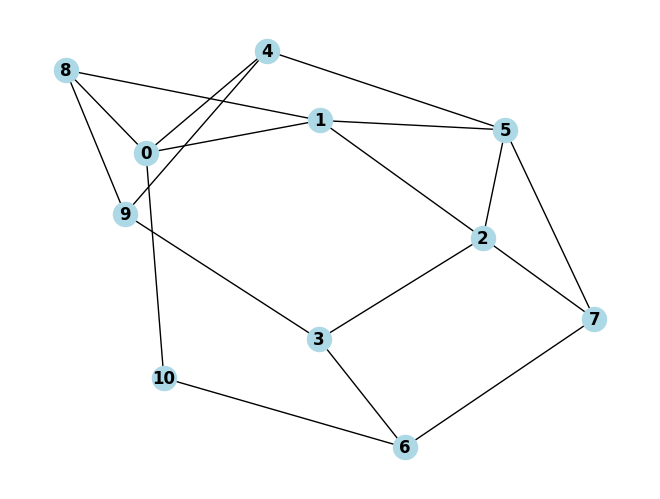

In [2]:
g = nx.Graph()

g.add_node(0)
g.add_node(1)
g.add_node(2)
g.add_node(3)
g.add_node(4)
g.add_node(5)
g.add_node(6)
g.add_node(7)
g.add_node(8)
g.add_node(9)
g.add_node(10)

g.add_edge(0,1)
g.add_edge(0,4)
g.add_edge(1, 2)
g.add_edge(1, 8)
g.add_edge(4, 5)
g.add_edge(2,3)
g.add_edge(9, 4)
g.add_edge(5,7)
g.add_edge(6, 7)
g.add_edge(10, 6)
g.add_edge(7, 2)
g.add_edge(6,3)
g.add_edge(3, 9)
g.add_edge(2, 5)
g.add_edge(9, 8)
g.add_edge(1, 5)
g.add_edge(0, 8)
g.add_edge(0, 10)

print("Number of nodes: ", len(g.nodes()))
print("Number of edges: ", len(g.edges()))

nx.draw(g, with_labels=True, node_color= "lightblue", font_weight = "bold")
plt.show()

In [3]:
## Exercise

%matplotlib inline
import json
import random

import numpy as np
import pandas as pd
import networkx as nx

In [8]:
#Scaffording from last week (github: https://github.com/cbuntain/umd.inst414/blob/main/Module02/Week03-Exercises.ipynb)

g = nx.Graph() # Build the graph
with open("/content/imdb_movies_2000to2022.prolific.json", "r") as in_file:
    for line in in_file:

        # Load the movie from this line
        this_movie = json.loads(line)

        # Create a node for every actor
        for actor_id,actor_name in this_movie['actors']:
            g.add_node(actor_id, name=actor_name)

        # Iterate through the list of actors, generating all pairs
        #. Starting with the first actor in the list, generate pairs with all subsequent actors
        #. then continue to second actor in the list and repeat
        i = 0 # Counter in the list
        for left_actor_id,left_actor_name in this_movie['actors']:
            for right_actor_id,right_actor_name in this_movie['actors'][i+1:]:
                # Get the current weight, if it exists
                current_weight = g.get_edge_data(left_actor_id, right_actor_id, default={"weight":0})["weight"]

                # Add an edge for these actors
                g.add_edge(left_actor_id, right_actor_id, weight=current_weight+1)

            i += 1 # increment the counter

In [5]:
# This week's exercise

top_k = 20

centrality_pagerank = nx.pagerank(g)
print("/n Top 20 by PageRank")
for u in sorted(centrality_pagerank, key=centrality_pagerank.get, reverse=True)[:top_k]:
  print(u, g.nodes[u]['name'], centrality_pagerank[u])

/n Top 20 by PageRank
nm0000616 Eric Roberts 0.0022482416377486675
nm0222881 Tony Devon 0.0010533553882559285
nm0001744 Tom Sizemore 0.0010008925723445383
nm0000514 Michael Madsen 0.0009932829590384345
nm2278431 Joe Hammerstone 0.0009043083602567029
nm0001803 Danny Trejo 0.0008776206174674616
nm1678610 Theodore Bouloukos 0.0008129543505114521
nm0261724 Joe Estevez 0.0007955296187899144
nm2454994 Bill Oberst Jr. 0.0007076750662941119
nm0001002 Dean Cain 0.0006907239275141516
nm0004193 Debbie Rochon 0.0006634994746939596
nm0442207 Lloyd Kaufman 0.0006600672005115079
nm0865302 Tony Todd 0.0006056102145685397
nm0920460 Vernon Wells 0.000548169083822163
nm0001595 Michael Paré 0.0005450468848435154
nm1864017 Maria Olsen 0.000535540562953764
nm0000929 Corbin Bernsen 0.0005252887402668541
nm0694066 Clifton Powell 0.0005180125774601354
nm0828288 Brinke Stevens 0.0005149821653118294
nm0001367 C. Thomas Howell 0.0005133758406076007


In [6]:
centrality_degree = nx.degree_centrality(g)
print("/n Top 20 by Degree Centrality")
for u in sorted(centrality_degree, key=centrality_degree.get, reverse=True)[:top_k]:
  print(u, g.nodes[u]['name'], centrality_degree[u])

/n Top 20 by Degree Centrality
nm0000616 Eric Roberts 0.01719828612235182
nm0001744 Tom Sizemore 0.008331349678647942
nm0000514 Michael Madsen 0.007974291835277316
nm0001803 Danny Trejo 0.007230421328255177
nm2278431 Joe Hammerstone 0.006605570102356581
nm0222881 Tony Devon 0.006427041180671268
nm0001002 Dean Cain 0.005921209235896215
nm0442207 Lloyd Kaufman 0.005653415853368246
nm0261724 Joe Estevez 0.0055343965722447035
nm0000115 Nicolas Cage 0.005117829088312306
nm2454994 Bill Oberst Jr. 0.005058319447750536
nm0004193 Debbie Rochon 0.00502856462746965
nm0290556 James Franco 0.0049095453463461084
nm0865302 Tony Todd 0.004790526065222566
nm1678610 Theodore Bouloukos 0.004790526065222566
nm0000246 Bruce Willis 0.004671506784099024
nm0001595 Michael Paré 0.004492977862413711
nm0000168 Samuel L. Jackson 0.00443346822185194
nm0000353 Willem Dafoe 0.004403713401571054
nm0000448 Lance Henriksen 0.004314448940728398


In [7]:
 centrality_btw =nx.betweenness_centrality(g,k=20)
 print("/n Top 20 by Betweenness")
 for u in sorted(centrality_btw, key= centrality_btw.get, reverse = True) [:top_k]:
  print(u, g.nodes[u]['name'], centrality_btw[u])

/n Top 20 by Betweenness
nm0000616 Eric Roberts 0.08070053049980773
nm0000514 Michael Madsen 0.06260090270810588
nm0004109 Gulshan Grover 0.06008169049834973
nm0000803 Christopher Atkins 0.05485961035599405
nm0001803 Danny Trejo 0.05155263069010435
nm0096013 Mark Borchardt 0.051360103053513066
nm0815370 Shannyn Sossamon 0.050965971995443025
nm5953203 Sara Wolfkind 0.050395750885232245
nm1824165 Mike Burnell 0.05036450739429286
nm0911933 Zack Ward 0.05015420322780214
nm0227178 Angela DiMarco 0.05014395725193779
nm0000603 Vanessa Redgrave 0.049889904556203256
nm0040015 Mackenzie Astin 0.049804284637901826
nm0005042 Jason Isaacs 0.0492865413570834
nm0184392 Martin Kove 0.04834638120158448
nm0002326 Al Sapienza 0.04741827801444542
nm1143816 Lily Rabe 0.0405562550521193
nm0865302 Tony Todd 0.038394214078366344
nm0000516 Lee Majors 0.03613156055233346
nm1647994 Natasha Alam 0.03291702396192317


In [9]:
# Exercise 2 (Optional): Keanu Reeves Ego Graph
import networkx as nx

keanu_id = "nm0000206"  # Keanu Reeves IMDb ID

# Build ego graph (3 hops away from Keanu)
keanu_ego = nx.ego_graph(g, keanu_id, radius=3)
print(f"Subgraph created with {keanu_ego.number_of_nodes()} nodes and {keanu_ego.number_of_edges()} edges.")

# Save it as a GraphML file
nx.write_graphml(keanu_ego, "keanu_ego_graph.graphml")
print("Saved as keanu_ego_graph.graphml")


Subgraph created with 13634 nodes and 68470 edges.
Saved as keanu_ego_graph.graphml
